In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt
import seaborn as sbn

data=pd.read_csv('train_data.csv')
test=pd.read_csv('test_a.csv')
data.head()

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
0,100309852,68.06,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,SH,...,0,0.0000,28248,614,111546,1124.0,284.0,0,2018/11/28,2000.0
1,100307942,125.55,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,SH,...,0,0.0000,14823,148,157552,701.0,22.0,1,2018/12/16,2000.0
2,100307764,132.00,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,SH,...,0,0.0000,77645,520,131744,57.0,20.0,1,2018/12/22,16000.0
3,100306518,57.00,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,SH,...,332760000,3080.0331,8750,1665,253337,888.0,279.0,9,2018/12/21,1600.0
4,100305262,129.00,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,SH,...,0,0.0000,800,117,125309,2038.0,480.0,0,2018/11/18,2900.0


In [2]:
test.head()

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime
0,100000079,36.54,未知方式,1室1厅1卫,高,21,西北,其他,XQ03867,SH,...,0.00,0,0.0,41503,319,301635,1601.0,397.0,2,2018/10/25
1,100000138,64.00,未知方式,2室1厅1卫,高,11,南北,其他,XQ00821,SH,...,0.00,0,0.0,4370,0,306857,21123.0,3066.0,0,2018/8/19
2,100000192,98.00,未知方式,3室1厅1卫,高,6,暂无数据,精装,XQ00842,SH,...,0.00,0,0.0,4370,0,306857,17471.0,2554.0,0,2018/3/4
3,100000200,43.45,未知方式,1室1厅1卫,高,6,暂无数据,其他,XQ00786,SH,...,0.00,0,0.0,4370,0,306857,19231.0,2016.0,0,2018/2/3
4,100000430,92.00,未知方式,2室2厅1卫,高,6,暂无数据,其他,XQ01201,SH,...,237828.35,1078790000,4536.0,20904,0,245872,26189.0,2957.0,0,2018/3/14


In [3]:
data.columns

Index(['ID', 'area', 'rentType', 'houseType', 'houseFloor', 'totalFloor',
       'houseToward', 'houseDecoration', 'communityName', 'city', 'region',
       'plate', 'buildYear', 'saleSecHouseNum', 'subwayStationNum',
       'busStationNum', 'interSchoolNum', 'schoolNum', 'privateSchoolNum',
       'hospitalNum', 'drugStoreNum', 'gymNum', 'bankNum', 'shopNum',
       'parkNum', 'mallNum', 'superMarketNum', 'totalTradeMoney',
       'totalTradeArea', 'tradeMeanPrice', 'tradeSecNum', 'totalNewTradeMoney',
       'totalNewTradeArea', 'tradeNewMeanPrice', 'tradeNewNum', 'remainNewNum',
       'supplyNewNum', 'supplyLandNum', 'supplyLandArea', 'tradeLandNum',
       'tradeLandArea', 'landTotalPrice', 'landMeanPrice', 'totalWorkers',
       'newWorkers', 'residentPopulation', 'pv', 'uv', 'lookNum', 'tradeTime',
       'tradeMoney'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41440 entries, 0 to 41439
Data columns (total 51 columns):
ID                    41440 non-null int64
area                  41440 non-null float64
rentType              41440 non-null object
houseType             41440 non-null object
houseFloor            41440 non-null object
totalFloor            41440 non-null int64
houseToward           41440 non-null object
houseDecoration       41440 non-null object
communityName         41440 non-null object
city                  41440 non-null object
region                41440 non-null object
plate                 41440 non-null object
buildYear             41440 non-null object
saleSecHouseNum       41440 non-null int64
subwayStationNum      41440 non-null int64
busStationNum         41440 non-null int64
interSchoolNum        41440 non-null int64
schoolNum             41440 non-null int64
privateSchoolNum      41440 non-null int64
hospitalNum           41440 non-null int64
drugStoreNum       

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 50 columns):
ID                    2469 non-null int64
area                  2469 non-null float64
rentType              2469 non-null object
houseType             2469 non-null object
houseFloor            2469 non-null object
totalFloor            2469 non-null int64
houseToward           2469 non-null object
houseDecoration       2469 non-null object
communityName         2469 non-null object
city                  2469 non-null object
region                2469 non-null object
plate                 2469 non-null object
buildYear             2469 non-null object
saleSecHouseNum       2469 non-null int64
subwayStationNum      2469 non-null int64
busStationNum         2469 non-null int64
interSchoolNum        2469 non-null int64
schoolNum             2469 non-null int64
privateSchoolNum      2469 non-null int64
hospitalNum           2469 non-null int64
drugStoreNum          2469 non-null int64

In [26]:
#缺失值分析
def lack(data):
    print('缺失值的列:{}'.format(data.columns[data.isnull().any()].tolist()))

    null_ratio=len(data['pv'][pd.isnull(data['pv'])])/len(data)

    print('缺失比例:{}'.format(null_ratio))

    print("缺失值个数:")

    print("pv缺失值的个数:",data['pv'].isnull().sum())

    print("uv缺失值的个数:",data['uv'].isnull().sum())
    
lack(data)
#测试数据集
print("测试数据集")
lack(test)

#大部分特征没有缺失值，在pv,uv存在缺失值

#可以得知缺失值是一同缺失的

data[data['pv'].isnull()&data['uv'].isnull()]

缺失值的列:['pv', 'uv']
缺失比例:0.00043436293436293434
缺失值个数:
pv缺失值的个数: 18
uv缺失值的个数: 18
测试数据集
缺失值的列:['pv', 'uv']
缺失比例:0.0008100445524503848
缺失值个数:
pv缺失值的个数: 2
uv缺失值的个数: 2


,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
38859,100312203,136.00,--,3室2厅2卫,中,37,东,其他,XQ02968,SH,...,0,0.0,102958,492,70013,NaN,NaN,0,2018/12/15,1400.0
4376,100312218,100.20,整租,2室2厅1卫,中,32,南,精装,XQ02979,SH,...,0,0.0,102958,492,70013,NaN,NaN,4,2018/12/15,13800.0
4387,100312196,24.81,整租,1室0厅1卫,中,6,南,精装,XQ02994,SH,...,0,0.0,102958,492,70013,NaN,NaN,1,2018/12/17,5600.0
4379,100312213,43.20,整租,1室1厅1卫,高,7,南,精装,XQ03016,SH,...,0,0.0,102958,492,70013,NaN,NaN,14,2018/12/18,4500.0
39410,100312061,29.40,整租,1室0厅1卫,中,6,北,精装,XQ03016,SH,...,0,0.0,102958,492,70013,NaN,NaN,0,2018/12/2,3700.0
4391,100312188,65.11,整租,2室1厅1卫,低,24,南,简装,XQ02993,SH,...,0,0.0,102958,492,70013,NaN,NaN,10,2018/12/20,6000.0
4399,100312163,23.91,整租,1室0厅1卫,中,6,南,简装,XQ02994,SH,...,0,0.0,102958,492,70013,NaN,NaN,7,2018/12/21,3700.0
4392,100312179,55.00,整租,1室1厅1卫,中,6,南,其他,XQ02963,SH,...,0,0.0,102958,492,70013,NaN,NaN,2,2018/12/21,6300.0
4373,100312226,46.55,整租,2室1厅1卫,低,6,南,精装,XQ02996,SH,...,0,0.0,102958,492,70013,NaN,NaN,6,2018/12/23,6000.0
4396,100312169,49.00,--,2室1厅1卫,低,7,南,其他,XQ03002,SH,...,0,0.0,102958,492,70013,NaN,NaN,9,2018/12/23,8400.0


# 特征值分析

In [6]:
#根据分析，可以将数据属性分为类别特征和连续型特征
#类别特征
category_feauture=[ 'rentType', 'houseType', 'houseFloor','houseToward', 'houseDecoration', 'communityName', 'city', 'region',
                    'plate', 'buildYear']

#连续型特征
Value_feauture=[f for f in data.columns if f not in category_feauture and f not in ['tradeTime','tradeMoney']]
Value_feauture

['ID',
 'area',
 'totalFloor',
 'saleSecHouseNum',
 'subwayStationNum',
 'busStationNum',
 'interSchoolNum',
 'schoolNum',
 'privateSchoolNum',
 'hospitalNum',
 'drugStoreNum',
 'gymNum',
 'bankNum',
 'shopNum',
 'parkNum',
 'mallNum',
 'superMarketNum',
 'totalTradeMoney',
 'totalTradeArea',
 'tradeMeanPrice',
 'tradeSecNum',
 'totalNewTradeMoney',
 'totalNewTradeArea',
 'tradeNewMeanPrice',
 'tradeNewNum',
 'remainNewNum',
 'supplyNewNum',
 'supplyLandNum',
 'supplyLandArea',
 'tradeLandNum',
 'tradeLandArea',
 'landTotalPrice',
 'landMeanPrice',
 'totalWorkers',
 'newWorkers',
 'residentPopulation',
 'pv',
 'uv',
 'lookNum']

## 类别特征分析

In [7]:
#类别特征分析

for f in category_feauture:
    print(data[f].unique())
    print(data[f].value_counts())
    print(len(data[f].unique()))

#类别数量

#rentType 3  这里存在一个‘-’异常值  ,且大部分是未知方式，是否可以用这个特征
#houseType  104      这里种类蛮多，前面几种类型房子更受欢迎
#houseFloor  3      分布比较均匀
#houseToward  10    南房间更受大家喜欢
#houseDecoration 4   大部分是其他方式
#communityName 4236   #分布比较分散 XQ01834比较多
#city  1   由于城市只有一个值，所以城市特征可以删除
#region 15  板块RG00002比较受欢迎
#plate 66   分布较均匀
#buildYear 66  分散

['未知方式' '整租' '合租' '--']
未知方式    30759
整租       5472
合租       5204
--          5
Name: rentType, dtype: int64
4
['2室1厅1卫' '3室2厅2卫' '1室1厅1卫' '3室2厅3卫' '4室3厅3卫' '2室2厅1卫' '3室2厅1卫' '3室1厅1卫'
 '5室2厅3卫' '2室1厅2卫' '4室2厅2卫' '1室0厅1卫' '4室2厅3卫' '1室0厅0卫' '2室2厅2卫' '2室0厅1卫'
 '1室2厅1卫' '6室3厅4卫' '4室2厅4卫' '4室2厅1卫' '5室3厅5卫' '4室3厅2卫' '6室3厅2卫' '5室2厅2卫'
 '5室2厅4卫' '1室1厅2卫' '4室1厅3卫' '3室0厅1卫' '5室3厅4卫' '5室5厅4卫' '4室3厅5卫' '4室3厅4卫'
 '0室0厅1卫' '5室2厅5卫' '7室2厅3卫' '3室2厅4卫' '3室3厅2卫' '3室1厅2卫' '5室4厅5卫' '5室3厅3卫'
 '5室2厅6卫' '5室3厅1卫' '3室4厅4卫' '6室2厅4卫' '6室1厅4卫' '3室1厅3卫' '6室2厅3卫' '5室4厅3卫'
 '2室2厅3卫' '4室1厅1卫' '5室1厅1卫' '1室2厅2卫' '6室1厅1卫' '4室1厅2卫' '5室3厅6卫' '4室2厅5卫'
 '6室2厅2卫' '5室1厅2卫' '5室4厅4卫' '2室3厅1卫' '6室4厅2卫' '7室1厅7卫' '3室3厅4卫' '3室2厅5卫'
 '6室3厅5卫' '4室0厅1卫' '5室4厅2卫' '7室4厅3卫' '6室3厅3卫' '6室2厅5卫' '6室2厅7卫' '4室0厅4卫'
 '2室2厅0卫' '3室3厅3卫' '8室3厅4卫' '6室2厅6卫' '1室1厅0卫' '2室1厅0卫' '5室3厅2卫' '5室2厅1卫'
 '2室0厅0卫' '7室1厅1卫' '6室2厅1卫' '8室2厅4卫' '7室2厅1卫' '2室0厅2卫' '3室0厅2卫' '4室0厅2卫'
 '3室1厅0卫' '3室0厅0卫' '9室2厅5卫' '6室4厅5卫' '4室4厅2卫' '4室1厅4卫' '8室4厅4卫' '7室2厅4卫'
 '7室1厅3卫' '8室

In [8]:
for f in category_feauture:
    print(test[f].unique())
    print(len(test[f].unique()))

['未知方式' '整租' '合租']
3
['1室1厅1卫' '2室1厅1卫' '3室1厅1卫' '2室2厅1卫' '2室2厅2卫' '3室1厅2卫' '3室2厅2卫' '1室0厅1卫'
 '1室2厅1卫' '3室2厅1卫' '4室2厅2卫' '4室1厅1卫' '2室1厅2卫' '3室3厅2卫' '2室0厅1卫' '5室1厅1卫'
 '1室1厅2卫' '3室2厅3卫' '4室3厅2卫' '3室0厅1卫' '4室2厅3卫' '5室2厅2卫' '1室2厅2卫' '1室2厅0卫'
 '4室1厅2卫' '1室0厅0卫' '3室2厅0卫' '2室3厅1卫' '1室1厅0卫' '4室1厅4卫' '6室0厅6卫']
31
['高' '低' '中']
3
['西北' '南北' '暂无数据' '西南' '南' '西' '东南' '东']
8
['其他' '精装' '简装' '毛坯']
4
['XQ03867' 'XQ00821' 'XQ00842' ... 'XQ01093' 'XQ01108' 'XQ01746']
2469
['SH']
1
['RG00012' 'RG00002' 'RG00014' 'RG00005' 'RG00001' 'RG00013' 'RG00010'
 'RG00003' 'RG00007' 'RG00011' 'RG00004' 'RG00006' 'RG00009' 'RG00008']
14
['BK00013' 'BK00055' 'BK00062' 'BK00054' 'BK00061' 'BK00056' 'BK00060'
 'BK00052' 'BK00002' 'BK00004' 'BK00059' 'BK00040' 'BK00003' 'BK00050'
 'BK00063' 'BK00053' 'BK00065' 'BK00007' 'BK00038' 'BK00037' 'BK00049'
 'BK00021' 'BK00039' 'BK00017' 'BK00022' 'BK00051' 'BK00035' 'BK00045'
 'BK00064' 'BK00034' 'BK00057' 'BK00033' 'BK00020' 'BK00018' 'BK00006'
 'BK00066' 'BK00019' 'BK0001

In [9]:
data[data['rentType']=='--']

#这里只有几条数据是‘--’类别，说明这个为异常的

#可以将该类特征补充为未知

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
4370,100312249,63.26,--,1室2厅1卫,低,30,南,其他,XQ03008,SH,...,0,0.0,102958,492,70013,NaN,NaN,0,2018/12/6,10700.0
4396,100312169,49.00,--,2室1厅1卫,低,7,南,其他,XQ03002,SH,...,0,0.0,102958,492,70013,NaN,NaN,9,2018/12/23,8400.0
4428,100312036,37.80,--,1室1厅1卫,高,7,南,其他,XQ03002,SH,...,0,0.0,102958,492,70013,NaN,NaN,0,2018/12/3,5300.0
38859,100312203,136.00,--,3室2厅2卫,中,37,东,其他,XQ02968,SH,...,0,0.0,102958,492,70013,NaN,NaN,0,2018/12/15,1400.0
39407,100312240,30.00,--,1室1厅1卫,中,6,北,其他,XQ02980,SH,...,0,0.0,102958,492,70013,NaN,NaN,0,2018/12/9,4600.0


In [10]:
# 单调特征列
def increasing(vals):
    len_=len(vals)
    count=0
    for i in range(len_-1):
        if(vals[i+1]>vals[i]):
            count+=1
    return count

for f in Value_feauture+['tradeTime','tradeMoney']:
    count=increasing(data[f].values)
    if(count/data.shape[0]>=0.55):
        print("单调特征：",f)
        print("单调特征的个数：",count)
        print("单调特征的所占比例：",count/data.shape[0])

单调特征： tradeTime
单调特征的个数： 24085
单调特征的所占比例： 0.5812017374517374


In [11]:
#按时间进行排序
data=data.sort_values('tradeTime')#.reset_index()

#最小的时间
print(data['tradeTime'].min())
#  2018/1/1

#最大的时间
print(data['tradeTime'].max())
# 2018/9/9

data

#这里的时间特征是一个单调特征

2018/1/1
2018/9/9


,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
9529,100237533,10.60,合租,3室1厅1卫,中,23,南,精装,XQ02533,SH,...,0,0.000000,74225,0,318387,22246.0,1247.0,0,2018/1/1,2060.0
14231,100152787,15.40,合租,4室1厅1卫,低,6,南,精装,XQ00506,SH,...,0,0.000000,166244,0,190706,27830.0,2707.0,0,2018/1/1,2890.0
9772,100233534,14.00,合租,3室1厅1卫,中,23,南,精装,XQ02533,SH,...,0,0.000000,74225,0,318387,22246.0,1247.0,0,2018/1/1,2060.0
39017,100160787,34.53,整租,1室1厅1卫,中,6,东,精装,XQ03927,SH,...,0,0.000000,41503,0,301635,29793.0,2056.0,0,2018/1/1,3690.0
28113,100054180,13.00,合租,3室1厅1卫,高,13,南,精装,XQ02123,SH,...,0,0.000000,77347,0,153762,24585.0,1880.0,0,2018/1/1,3160.0
1228,100163108,10.00,合租,3室1厅1卫,高,11,西北,精装,XQ03137,SH,...,0,0.000000,5622,0,210903,20860.0,1938.0,0,2018/1/1,1630.0
14651,100147878,14.10,合租,4室1厅1卫,高,11,南,精装,XQ03696,SH,...,0,0.000000,88718,0,194111,17750.0,1378.0,0,2018/1/1,2490.0
19675,100103381,12.36,合租,3室1厅1卫,高,18,南,精装,XQ03281,SH,...,284460000,4549.958613,5271,0,201051,18291.0,1641.0,0,2018/1/1,960.0
23935,100077685,58.62,整租,2室1厅1卫,高,6,南,精装,XQ02021,SH,...,0,0.000000,34941,0,330610,14932.0,1473.0,0,2018/1/1,4090.0
22172,100088128,11.60,合租,3室1厅1卫,中,8,南,精装,XQ01834,SH,...,0,0.000000,50134,0,226469,31030.0,2370.0,0,2018/1/1,1890.0


     tradeTime  tradeMoney
0     2018/1/1     42070.0
1    2018/1/10     87360.0
2    2018/1/11    146110.0
3    2018/1/12    159680.0
4    2018/1/13    165850.0
5    2018/1/14    106870.0
6    2018/1/15     82040.0
7    2018/1/16     57260.0
8    2018/1/17     42410.0
9    2018/1/18     44740.0
10   2018/1/19     65740.0
11    2018/1/2     14750.0
12   2018/1/20    249990.0
13   2018/1/21    185160.0
14   2018/1/22     95537.0
15   2018/1/23    118843.0
16   2018/1/24    130400.0
17   2018/1/25     85767.0
18   2018/1/26    241290.0
19   2018/1/27    153800.0
20   2018/1/28    159680.0
21   2018/1/29    117692.0
22    2018/1/3     61185.0
23   2018/1/30    141253.0
24   2018/1/31    193880.0
25    2018/1/4     41500.0
26    2018/1/5     90480.0
27    2018/1/6    101870.0
28    2018/1/7    152350.0
29    2018/1/8     86080.0
..         ...         ...
331   2018/9/1    957573.0
332  2018/9/10    616300.0
333  2018/9/11    568433.0
334  2018/9/12    500920.0
335  2018/9/13    548730.0
3

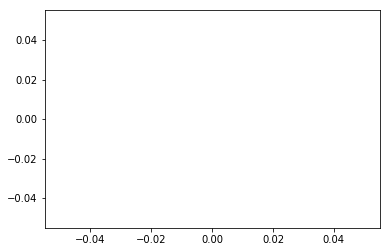

In [13]:
#统计不同时间的交易量
date_num=data.groupby(['tradeTime'])[['tradeMoney']].agg('sum').reset_index()
print(date_num)
plt.plot(date_num[date_num['tradeMoney']<1000]['tradeMoney'])

#前期到后期交易金额慢慢增多，后面的增长存在时间序列关系

rentType
未知方式    30759
整租       5472
合租       5204
--          5
Name: rentType, dtype: int64


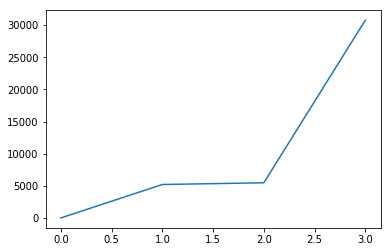

houseType
1室1厅1卫    9805
2室1厅1卫    8512
2室2厅1卫    6783
3室1厅1卫    3992
3室2厅2卫    2737
4室1厅1卫    1957
3室2厅1卫    1920
1室0厅1卫    1286
1室2厅1卫     933
2室2厅2卫     881
4室2厅2卫     435
2室0厅1卫     419
4室2厅3卫     273
5室1厅1卫     197
2室1厅2卫     155
3室2厅3卫     149
3室1厅2卫     135
1室0厅0卫      86
6室1厅1卫      65
4室2厅4卫      62
5室2厅3卫      54
4室2厅1卫      40
1室1厅2卫      39
4室3厅3卫      34
4室3厅4卫      34
5室2厅2卫      33
5室3厅3卫      30
5室2厅4卫      30
5室3厅4卫      20
4室1厅2卫      20
          ... 
7室1厅3卫       1
5室5厅4卫       1
3室4厅4卫       1
7室4厅3卫       1
8室4厅4卫       1
6室4厅5卫       1
5室1厅3卫       1
6室2厅5卫       1
8室2厅4卫       1
4室1厅4卫       1
3室2厅5卫       1
7室3厅4卫       1
6室4厅2卫       1
6室4厅4卫       1
6室1厅4卫       1
5室4厅5卫       1
3室1厅0卫       1
2室1厅3卫       1
5室1厅5卫       1
9室3厅8卫       1
4室4厅2卫       1
4室0厅2卫       1
0室0厅1卫       1
8室2厅3卫       1
5室2厅6卫       1
8室3厅4卫       1
5室4厅2卫       1
7室1厅7卫       1
9室2厅5卫       1
6室2厅6卫       1
Name: houseType, Length: 104, dtype: int64


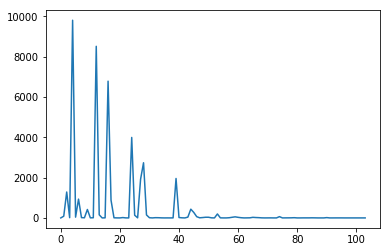

houseFloor
中    15458
高    14066
低    11916
Name: houseFloor, dtype: int64


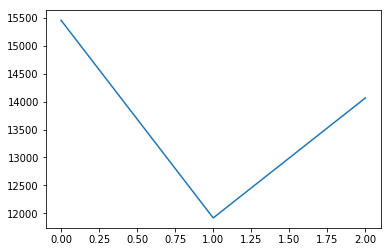

houseToward
南       34377
南北       2254
北        2043
暂无数据      963
东南        655
东         552
西         264
西南        250
西北         58
东西         24
Name: houseToward, dtype: int64


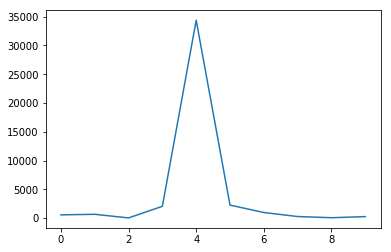

houseDecoration
其他    29040
精装    10918
简装     1171
毛坯      311
Name: houseDecoration, dtype: int64


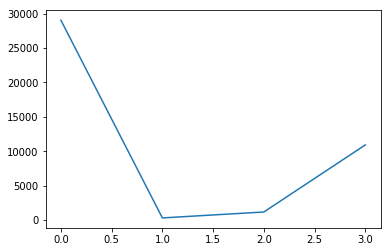

communityName
XQ01834    358
XQ01274    192
XQ02273    188
XQ03110    185
XQ02337    173
XQ01389    166
XQ01658    163
XQ02789    152
XQ01561    151
XQ00530    151
XQ01339    132
XQ00826    122
XQ01873    122
XQ02296    121
XQ01232    119
XQ01401    118
XQ02441    117
XQ00196    115
XQ02365    109
XQ01207    109
XQ01410    108
XQ00852    105
XQ01672    103
XQ02072    103
XQ01634     99
XQ01642     99
XQ01375     99
XQ01970     96
XQ00210     93
XQ01413     92
          ... 
XQ02068      1
XQ01528      1
XQ03814      1
XQ03835      1
XQ02640      1
XQ01430      1
XQ04018      1
XQ00047      1
XQ02466      1
XQ02708      1
XQ00206      1
XQ02949      1
XQ02801      1
XQ03917      1
XQ02142      1
XQ02162      1
XQ02564      1
XQ03208      1
XQ03151      1
XQ03084      1
XQ02417      1
XQ01962      1
XQ00193      1
XQ01218      1
XQ00560      1
XQ03728      1
XQ01485      1
XQ03296      1
XQ03509      1
XQ01394      1
Name: communityName, Length: 4236, dtype: int64
city
SH    41440
Name: 

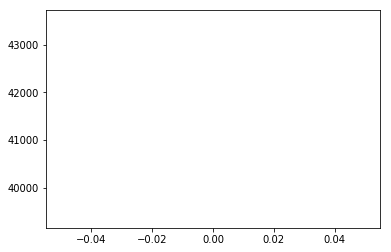

region
RG00002    11437
RG00005     5739
RG00003     4186
RG00010     3640
RG00012     3368
RG00004     3333
RG00006     1961
RG00007     1610
RG00008     1250
RG00013     1215
RG00001     1157
RG00014     1069
RG00011      793
RG00009      681
RG00015        1
Name: region, dtype: int64


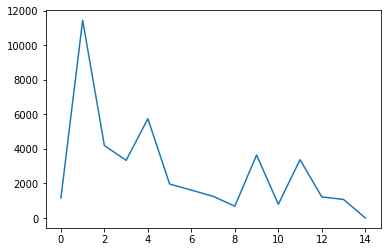

plate
BK00031    1958
BK00033    1837
BK00045    1816
BK00055    1566
BK00056    1516
BK00052    1375
BK00017    1305
BK00041    1266
BK00054    1256
BK00051    1253
BK00046    1227
BK00035    1156
BK00042    1137
BK00009    1016
BK00050     979
BK00043     930
BK00026     906
BK00047     880
BK00034     849
BK00013     834
BK00053     819
BK00028     745
BK00040     679
BK00060     671
BK00010     651
BK00029     646
BK00062     618
BK00022     614
BK00018     613
BK00064     590
           ... 
BK00037     444
BK00012     412
BK00038     398
BK00024     397
BK00020     384
BK00002     357
BK00065     348
BK00027     344
BK00039     343
BK00063     281
BK00057     278
BK00015     253
BK00006     231
BK00021     226
BK00007     225
BK00030     219
BK00066     219
BK00049     211
BK00008     210
BK00004     189
BK00048     165
BK00025     157
BK00023     127
BK00059     122
BK00044      98
BK00016      40
BK00036      33
BK00058      15
BK00032       3
BK00001       1
Name: plate, Lengt

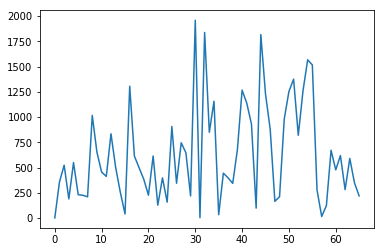

buildYear
1994    2851
暂无信息    2808
2006    2007
2007    1851
2008    1849
2005    1814
2010    1774
1995    1685
1993    1543
2011    1498
2004    1431
2009    1271
2014    1238
2003    1156
1997    1125
2002    1120
2012    1049
1996     991
2000     925
2001     898
2015     840
1999     822
1998     733
2013     714
1987     632
1983     612
1991     545
1984     493
1980     452
1990     431
        ... 
1964      39
1960      33
1930      30
1973      23
1955      20
1932      19
2017      14
1936      12
1952      12
1931      11
1968      10
1965       8
1967       7
1910       5
1920       5
1937       5
1949       4
1963       4
1940       4
1959       3
1970       3
1969       3
1912       3
1972       2
1926       2
1961       2
1939       2
1951       1
1962       1
1950       1
Name: buildYear, Length: 80, dtype: int64


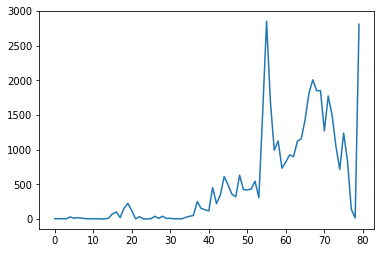

In [58]:
#画出类别特征的数值分布
#类别的线性图
for f in category_feauture:
    print(f)
    print(data[f].value_counts())
    if f not in ['communityName']: #该类别种类太多，图不好画
        fea_c=data.groupby([f])[['ID']].agg('count').reset_index()
        plt.plot(fea_c['ID'])
        plt.show()


In [57]:
#统计特征频次大于100次的特征

for f in category_feauture:
    fea_count=data.groupby([f])[['ID']].agg('count').reset_index()
    #sbn.distplot(fea_count['ID'])
    #plt.plot(fea_count['ID'])
   # plt.show()
    #fea_count.rename(columns={'ID':'count'})
    print(fea_count[fea_count['ID']>=100])

  rentType     ID
1       合租   5204
2       整租   5472
3     未知方式  30759
   houseType    ID
2     1室0厅1卫  1286
4     1室1厅1卫  9805
6     1室2厅1卫   933
9     2室0厅1卫   419
12    2室1厅1卫  8512
13    2室1厅2卫   155
16    2室2厅1卫  6783
17    2室2厅2卫   881
24    3室1厅1卫  3992
25    3室1厅2卫   135
27    3室2厅1卫  1920
28    3室2厅2卫  2737
29    3室2厅3卫   149
39    4室1厅1卫  1957
44    4室2厅2卫   435
45    4室2厅3卫   273
53    5室1厅1卫   197
  houseFloor     ID
0          中  15458
1          低  11916
2          高  14066
  houseToward     ID
0           东    552
1          东南    655
3           北   2043
4           南  34377
5          南北   2254
6        暂无数据    963
7           西    264
9          西南    250
  houseDecoration     ID
0              其他  29040
1              毛坯    311
2              简装   1171
3              精装  10918
     communityName   ID
195        XQ00196  115
529        XQ00530  151
825        XQ00826  122
851        XQ00852  105
1206       XQ01207  109
1231       XQ01232  119
1273       XQ01274  192


## 连续型特征分析

In [29]:
data.describe()
# 从分布值来看
# 'saleSecHouseNum','tradeLandArea','landTotalPrice','landMeanPrice','newWorkers','lookNum'
# 这些特征值的取值基本为0

,ID,area,totalFloor,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,...,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeMoney
count,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,...,41440.000000,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41422.000000,41422.000000,41440.000000,4.144000e+04
mean,1.001221e+08,70.959409,11.413152,1.338538,5.741192,187.197153,1.506395,48.228813,6.271911,4.308736,...,12621.406425,1.045363e+08,724.763918,77250.235497,1137.132095,294514.059459,26945.663512,3089.077085,0.396260,8.837074e+03
std,9.376566e+04,88.119569,7.375203,3.180349,4.604929,179.674625,1.687631,29.568448,4.946457,3.359714,...,49853.120341,5.215216e+08,3224.303831,132052.508523,7667.381627,196745.147181,32174.637924,2954.706517,1.653932,5.514287e+05
min,1.000000e+08,1.000000,0.000000,0.000000,0.000000,24.000000,0.000000,9.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,600.000000,0.000000,49330.000000,17.000000,6.000000,0.000000,0.000000e+00
25%,1.000470e+08,42.607500,6.000000,0.000000,2.000000,74.000000,0.000000,24.000000,2.000000,1.000000,...,0.000000,0.000000e+00,0.000000,13983.000000,0.000000,165293.000000,7928.000000,1053.000000,0.000000,2.800000e+03
50%,1.000960e+08,65.000000,7.000000,0.000000,5.000000,128.000000,1.000000,47.000000,5.000000,4.000000,...,0.000000,0.000000e+00,0.000000,38947.000000,0.000000,245872.000000,20196.000000,2375.000000,0.000000,4.000000e+03
75%,1.001902e+08,90.000000,16.000000,1.000000,7.000000,258.000000,3.000000,61.000000,9.000000,6.000000,...,0.000000,0.000000e+00,0.000000,76668.000000,0.000000,330610.000000,34485.000000,4233.000000,0.000000,5.500000e+03
max,1.003218e+08,15055.000000,88.000000,52.000000,22.000000,824.000000,8.000000,142.000000,24.000000,14.000000,...,555508.010000,6.197570e+09,37513.062490,855400.000000,143700.000000,928198.000000,621864.000000,39876.000000,37.000000,1.000000e+08


In [16]:
for vf in Value_feauture:
    sifen=np.percentile(data[vf], (50), interpolation='midpoint')
    #print(sifen)
    if(sifen==0):
        print(vf)

saleSecHouseNum
supplyNewNum
supplyLandNum
supplyLandArea
tradeLandNum
tradeLandArea
landTotalPrice
landMeanPrice
newWorkers
lookNum


D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [17]:
print(data.shape)
print("saleSecHouseNum的0的个数")
print(data[data['saleSecHouseNum']==0].shape)
#接近3/4的值为0

print("supplyNewNum的0的个数")
print(data[data['supplyNewNum']==0].shape)
print("supplyLandNum的0的个数")
print(data[data['supplyLandNum']==0].shape)
print("supplyLandArea的0的个数")
print(data[data['supplyLandArea']==0].shape)

print("tradeLandArea的0的个数")
print(data[data['tradeLandArea']==0].shape)

print("tradeLandNum的0的个数")
print(data[data['tradeLandNum']==0].shape)
#接近80%的值为0
#后面的特征都差不多
#有几个特征为0的个数是一样的，应该是特征相互关联

print("landTotalPrice的0的个数")
print(data[data['landTotalPrice']==0].shape)
print("landMeanPrice的0的个数")
print(data[data['landMeanPrice']==0].shape)
print("newWorkers的0的个数")
print(data[data['newWorkers']==0].shape)
print("lookNum的0的个数")
print(data[data['lookNum']==0].shape)

(41440, 51)
saleSecHouseNum的0的个数
(29937, 51)
supplyNewNum的0的个数
(33077, 51)
supplyLandNum的0的个数
(36356, 51)
supplyLandArea的0的个数
(36356, 51)
tradeLandArea的0的个数
(37691, 51)
tradeLandNum的0的个数
(37691, 51)
landTotalPrice的0的个数
(37691, 51)
landMeanPrice的0的个数
(37691, 51)
newWorkers的0的个数
(34416, 51)
lookNum的0的个数
(37194, 51)


In [18]:
data.corr()

,ID,area,totalFloor,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,...,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeMoney
ID,1.000000,0.003032,0.066104,0.066487,-0.209589,0.149062,0.068010,-0.060087,-0.118262,0.080632,...,0.091641,0.069468,0.049184,-0.076402,0.045793,0.015092,-0.064140,-0.197694,0.127877,-0.008343
area,0.003032,1.000000,0.082746,0.023909,-0.010355,0.033382,0.032986,-0.012624,-0.015293,-0.012392,...,0.016209,0.019631,0.013511,0.004930,0.022223,0.001592,0.012173,0.034391,0.009286,0.006719
totalFloor,0.066104,0.082746,1.000000,0.010170,0.006422,0.053091,-0.051045,-0.020157,-0.059855,0.035029,...,-0.004290,-0.017954,-0.017011,0.178294,0.029101,0.022682,0.097928,0.070085,-0.000028,0.006358
saleSecHouseNum,0.066487,0.023909,0.010170,1.000000,-0.026399,0.031629,-0.007285,-0.017954,0.032270,-0.012456,...,0.065817,0.083181,0.096914,-0.041772,0.076490,0.017066,-0.140116,-0.097992,0.177540,0.000391
subwayStationNum,-0.209589,-0.010355,0.006422,-0.026399,1.000000,0.252314,-0.026975,0.643900,0.188826,0.573360,...,-0.017522,-0.003857,0.009712,0.212760,0.154487,0.549301,0.233920,0.319362,-0.002066,-0.000733
busStationNum,0.149062,0.033382,0.053091,0.031629,0.252314,1.000000,0.297939,0.558335,0.047329,0.613182,...,0.334577,0.137075,0.138972,-0.057569,0.016074,0.845071,0.405936,0.389930,0.005901,-0.004737
interSchoolNum,0.068010,0.032986,-0.051045,-0.007285,-0.026975,0.297939,1.000000,0.133932,0.139548,0.181332,...,0.121680,0.093815,0.125085,0.040155,0.032677,0.153226,0.038747,0.017269,-0.000074,0.007757
schoolNum,-0.060087,-0.012624,-0.020157,-0.017954,0.643900,0.558335,0.133932,1.000000,0.443438,0.775448,...,0.116114,0.022003,0.041300,0.202449,0.167598,0.780225,0.254587,0.298972,0.007413,0.000568
privateSchoolNum,-0.118262,-0.015293,-0.059855,0.032270,0.188826,0.047329,0.139548,0.443438,1.000000,0.097900,...,-0.011380,-0.044983,-0.011327,0.227847,0.094423,0.300599,0.096464,0.145441,0.014583,0.006595
hospitalNum,0.080632,-0.012392,0.035029,-0.012456,0.573360,0.613182,0.181332,0.775448,0.097900,1.000000,...,0.149749,0.039733,0.069129,-0.045273,0.085045,0.754047,0.303874,0.304323,-0.007191,-0.004456


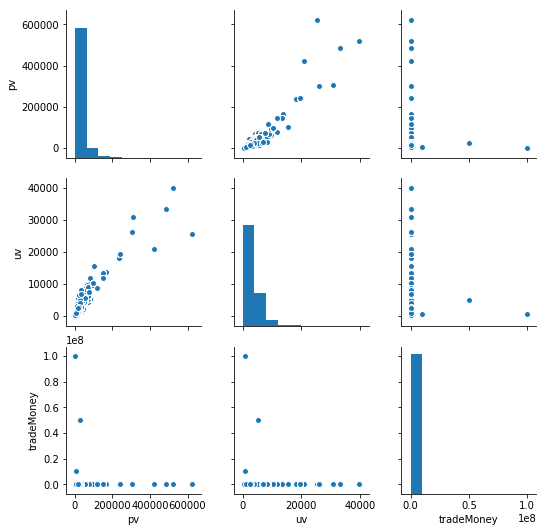

In [19]:
sbn.pairplot(data[data['pv'].notnull()][['pv','uv','tradeMoney']]) #,'residentPopulation','totalWorkers','totalNewTradeArea'

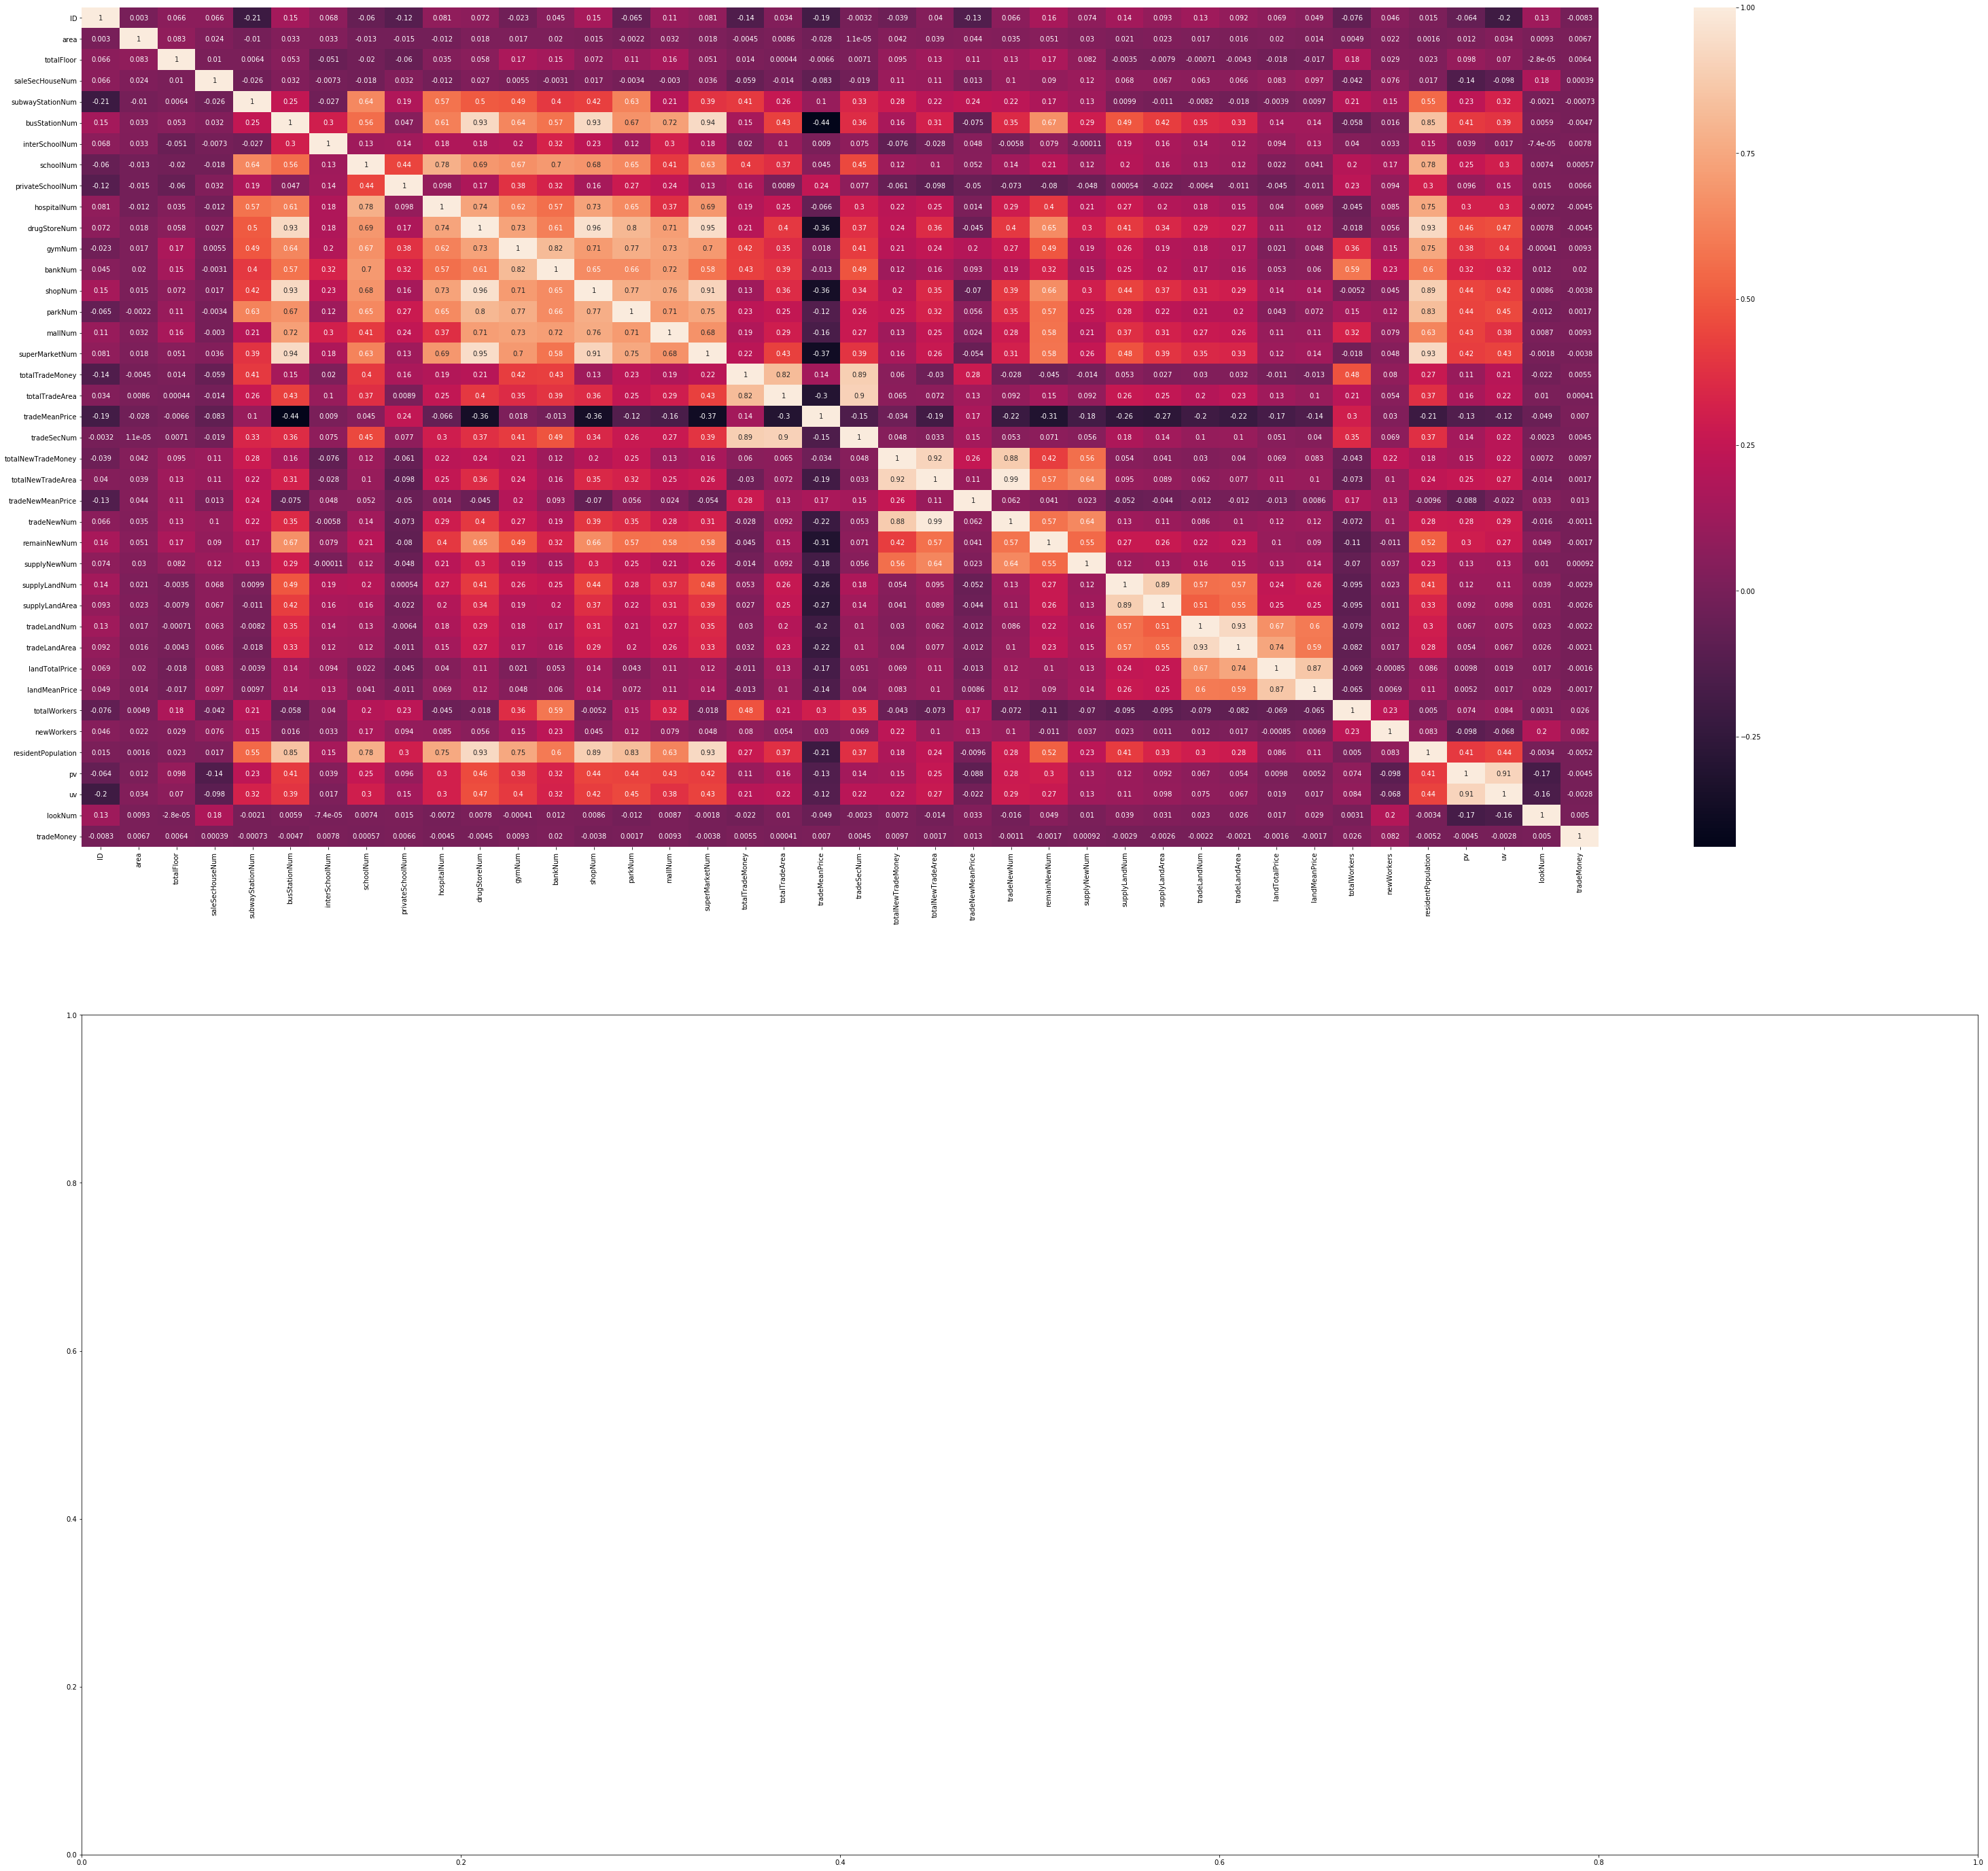

In [60]:
f, (ax1, ax2) = plt.subplots(figsize=(50,50),nrows=2)
sbn.heatmap(data.corr(),annot=True, ax=ax1)

In [68]:
money

,index,tradeMoney
0,9529,2060.0
1,14231,2890.0
2,9772,2060.0
3,39017,3690.0
4,28113,3160.0
5,1228,1630.0
6,14651,2490.0
7,19675,960.0
8,23935,4090.0
9,22172,1890.0


# Label分布

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\seaborn\distributions.py:195: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:646

"\nmoney=data[['tradeMoney']].reset_index()\n\nplt.subplot(221)\nplt.plot(money[money['tradeMoney']<200000]['tradeMoney'])\nplt.subplot(222)\nplt.plot(money[(money['tradeMoney']>=200000)&(money['tradeMoney']<500000)]['tradeMoney'])\nplt.show()\n"

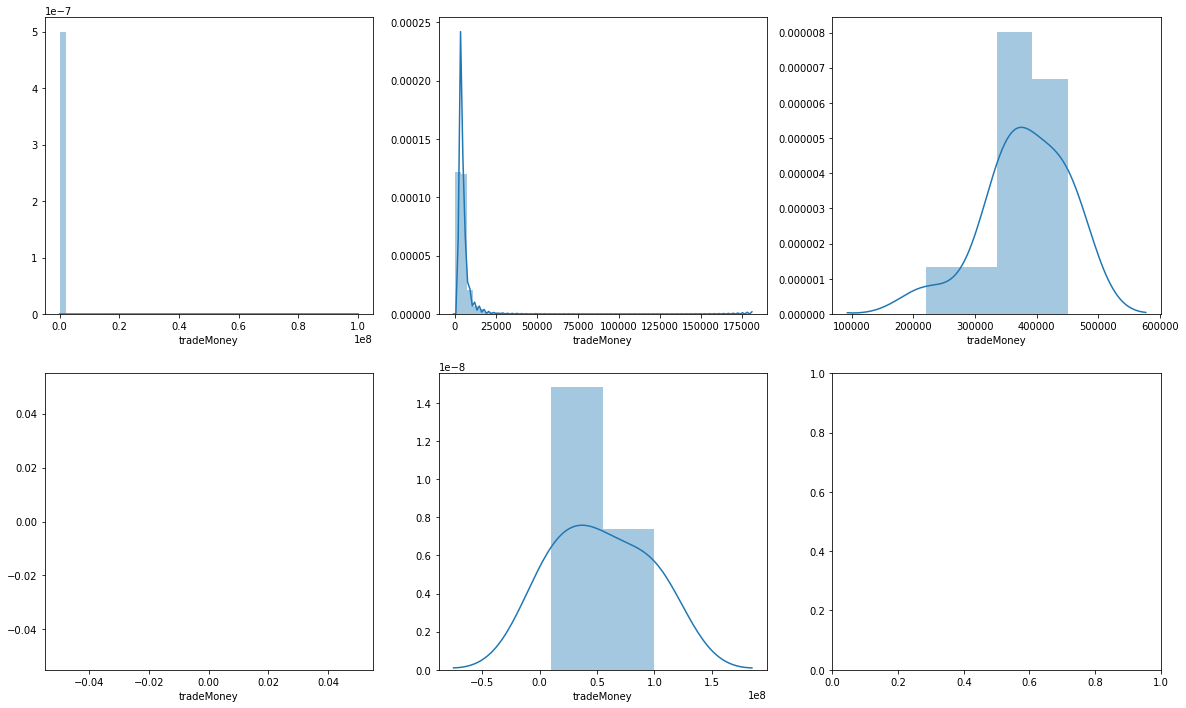

In [77]:
'''from sklearn.preprocessing import MinMaxScaler
money=data[['tradeMoney']].copy()
mm=MinMaxScaler(feature_range=(0,1))
money['tradeMoney']=mm.fit_transform(money[['tradeMoney']])
plt.plot(money['tradeMoney'])'''

#查看label分布

money=data[['tradeMoney']].reset_index()
fig,axs=plt.subplots(2,3,figsize=(20,5))
fig.set_size_inches(20,12)
sbn.distplot(money['tradeMoney'],ax=axs[0][0])
sbn.distplot(money[money['tradeMoney']<200000]['tradeMoney'],ax=axs[0][1])
sbn.distplot(money[(money['tradeMoney']>=200000)&(money['tradeMoney']<500000)]['tradeMoney'],ax=axs[0][2])
sbn.distplot(money[(money['tradeMoney']>=500000)&(money['tradeMoney']<1000000)]['tradeMoney'],ax=axs[1][0])
sbn.distplot(money[money['tradeMoney']>1000000]['tradeMoney'],ax=axs[1][1])


'''
money=data[['tradeMoney']].reset_index()

'''
#可以看出交易金额只在其中一小部分存在突然升高，大部分在100000以下

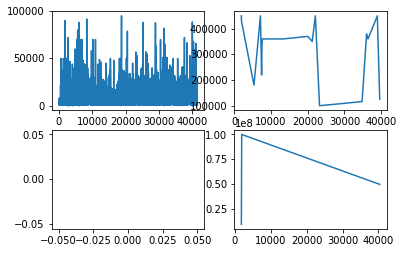

In [101]:
plt.subplot(221)
plt.plot(money[money['tradeMoney']<100000]['tradeMoney'])
plt.subplot(222)
plt.plot(money[(money['tradeMoney']>=100000)&(money['tradeMoney']<500000)]['tradeMoney'])
plt.subplot(223)
plt.plot(money[(money['tradeMoney']>=500000)&(money['tradeMoney']<1000000)]['tradeMoney'])
plt.subplot(224)
plt.plot(money[money['tradeMoney']>=1000000]['tradeMoney'])
plt.show()

#大多数交易量在2000000以下

In [107]:
#具体个数
print("小于100000的交易额数量")
print(data[data['tradeMoney']<100000]['tradeMoney'].count())
print("大于100000和小于500000的交易额数量")
print(data[(data['tradeMoney']>=100000)&(data['tradeMoney']<500000)]['tradeMoney'].count())
print("大于500000和小于1000000的交易额数量")
print(data[(data['tradeMoney']>=500000)&(data['tradeMoney']<1000000)]['tradeMoney'].count())
print("大于1000000的交易额数量")
print(data[data['tradeMoney']>1000000]['tradeMoney'].count())

#可以得出只有20个交易额是大于100000的房子，我判断这些房子是不是异常数据呢

小于100000的交易额数量
41420
大于100000和小于500000的交易额数量
17
大于500000和小于1000000的交易额数量
0
大于1000000的交易额数量
3
